In [ ]:
# import standard scientific libraries
import os
import math
import numpy as np
import pandas as pd
# import ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.legend()
  plt.grid(True)

In [ ]:
RANDOM_SEED = 4
np.random.seed(RANDOM_SEED)
pd.set_option('max_columns', None)
pd.set_option("display.precision", 8)
dataset = "../dataset/"

In [ ]:
train = pd.read_csv("train.csv")#[:66000]
train.shape
train

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
0,mof_unit_1,1116.667429,875.240600,0.00,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.86416611,6.786041,105.28450172
1,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,57,etb,33.61678033,7.147286,101.22477418
2,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.26372569,6.347967,118.98701075
3,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,24,sra,25.70137692,6.190085,187.62600450
4,mof_unit_5,1137.800963,901.736120,0.00,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.00183795,6.478063,79.21000066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68608,mof_unit_68609,1188.302573,1001.700216,0.00,0.00000,0.0000,Pr-F,3,4,24,pcu,24.13177036,NaN,-12.94365213
68609,mof_unit_68610,1506.660363,1493.296496,0.00,0.01108,0.0000,SO3H,10,42,46,etb,6.07181778,NaN,-12.98558157
68610,mof_unit_68611,2035.532738,1959.518320,0.00,0.00000,0.0000,OPr,4,14,22,acs,9.87613400,NaN,-13.18763527
68611,mof_unit_68612,3985.426053,3638.677280,0.00,0.00000,0.0000,OPr-Me,4,4,15,acs,5.28505063,inf,15.67269762


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68613 entries, 0 to 68612
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   MOFname                                        68613 non-null  object 
 1   volume [A^3]                                   68613 non-null  float64
 2   weight [u]                                     68613 non-null  float64
 3   surface_area [m^2/g]                           68613 non-null  float64
 4   void_fraction                                  68613 non-null  float64
 5   void_volume [cm^3/g]                           68613 non-null  float64
 6   functional_groups                              68290 non-null  object 
 7   metal_linker                                   68613 non-null  int64  
 8   organic_linker1                                68613 non-null  int64  
 9   organic_linker2                                686

In [ ]:
train = train.replace([np.inf, -np.inf], np.nan)
#train = train[train['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'].notna()]
train = train[train['functional_groups'].notna()]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68290 entries, 0 to 68612
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   MOFname                                        68290 non-null  object 
 1   volume [A^3]                                   68290 non-null  float64
 2   weight [u]                                     68290 non-null  float64
 3   surface_area [m^2/g]                           68290 non-null  float64
 4   void_fraction                                  68290 non-null  float64
 5   void_volume [cm^3/g]                           68290 non-null  float64
 6   functional_groups                              68290 non-null  object 
 7   metal_linker                                   68290 non-null  int64  
 8   organic_linker1                                68290 non-null  int64  
 9   organic_linker2                                682

In [ ]:
# train = pd.get_dummies(train, columns=["functional_groups"])
# train = pd.get_dummies(train, columns=["topology"])
# train

col = ["functional_groups", "topology"]
for i in col:
    train[i] = train[i].astype("category").cat.codes


In [ ]:
train = train.drop(['MOFname'],axis=1)
train= train[train['void_fraction'] > 0]
train= train[train['void_volume [cm^3/g]'] > 0]
#train  train[train['CO2/N2_selectivity'] > 0]
train = train[train['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'].notna()]
train= train[train['surface_area [m^2/g]'] > 0]

In [ ]:
train

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
1,2769.503842,2211.697211,603.61,0.13794,0.1040,115,10,44,57,2,33.61678033,7.147286,101.22477418
2,1089.818728,773.687960,788.50,0.14874,0.1262,303,2,22,24,5,19.26372569,6.347967,118.98701075
3,2205.198301,1304.638720,1441.53,0.21814,0.2220,139,9,17,24,8,25.70137692,6.190085,187.62600450
5,3954.659761,1543.027680,2430.55,0.37094,0.5725,373,9,7,23,8,17.14654102,5.398304,55.78695910
6,3565.914939,1954.749656,1530.02,0.33337,0.3662,200,10,53,55,2,18.36379134,6.303857,111.69046225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66519,1426.479810,1272.451540,1343.62,0.30190,0.2038,189,3,12,21,5,5.86767380,4.485481,7.60210519
66520,23943.701366,5497.752320,4182.24,0.66340,1.7399,149,1,9,27,5,4.06077197,3.605688,2.67523054
66521,14389.971556,4396.164320,4149.64,0.57051,1.1246,324,1,9,20,5,4.31341113,3.361233,-1.68609186
66522,16997.806645,3932.703680,4326.62,0.66963,1.7430,20,2,2,5,4,3.44744015,2.781566,-7.54680455


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53778 entries, 1 to 66523
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   volume [A^3]                                   53778 non-null  float64
 1   weight [u]                                     53778 non-null  float64
 2   surface_area [m^2/g]                           53778 non-null  float64
 3   void_fraction                                  53778 non-null  float64
 4   void_volume [cm^3/g]                           53778 non-null  float64
 5   functional_groups                              53778 non-null  int16  
 6   metal_linker                                   53778 non-null  int64  
 7   organic_linker1                                53778 non-null  int64  
 8   organic_linker2                                53778 non-null  int64  
 9   topology                                       537

In [ ]:
# find rows having NaN
train.isnull().any(axis=0)
#train.fillna(method='pad', inplace=True)
#train.groupby('functional_groups')['functional_groups'].count()


volume [A^3]                                     False
weight [u]                                       False
surface_area [m^2/g]                             False
void_fraction                                    False
void_volume [cm^3/g]                             False
functional_groups                                False
metal_linker                                     False
organic_linker1                                  False
organic_linker2                                  False
topology                                         False
CO2/N2_selectivity                               False
heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]    False
CO2_working_capacity [mL/g]                      False
dtype: bool

In [ ]:
count = 0
for i in train['functional_groups']:
    if i == 240:
        count = count+1
print(count)        
    

1036


In [ ]:
# find row having inf
np.isinf(train).any(axis=0)

volume [A^3]                                     False
weight [u]                                       False
surface_area [m^2/g]                             False
void_fraction                                    False
void_volume [cm^3/g]                             False
functional_groups                                False
metal_linker                                     False
organic_linker1                                  False
organic_linker2                                  False
topology                                         False
CO2/N2_selectivity                               False
heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]    False
CO2_working_capacity [mL/g]                      False
dtype: bool

In [ ]:
train

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
1,2769.503842,2211.697211,603.61,0.13794,0.1040,115,10,44,57,2,33.61678033,7.147286,101.22477418
2,1089.818728,773.687960,788.50,0.14874,0.1262,303,2,22,24,5,19.26372569,6.347967,118.98701075
3,2205.198301,1304.638720,1441.53,0.21814,0.2220,139,9,17,24,8,25.70137692,6.190085,187.62600450
5,3954.659761,1543.027680,2430.55,0.37094,0.5725,373,9,7,23,8,17.14654102,5.398304,55.78695910
6,3565.914939,1954.749656,1530.02,0.33337,0.3662,200,10,53,55,2,18.36379134,6.303857,111.69046225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66519,1426.479810,1272.451540,1343.62,0.30190,0.2038,189,3,12,21,5,5.86767380,4.485481,7.60210519
66520,23943.701366,5497.752320,4182.24,0.66340,1.7399,149,1,9,27,5,4.06077197,3.605688,2.67523054
66521,14389.971556,4396.164320,4149.64,0.57051,1.1246,324,1,9,20,5,4.31341113,3.361233,-1.68609186
66522,16997.806645,3932.703680,4326.62,0.66963,1.7430,20,2,2,5,4,3.44744015,2.781566,-7.54680455


In [ ]:
x  = train.drop(['CO2_working_capacity [mL/g]'],axis=1)
y  = train['CO2_working_capacity [mL/g]']

In [ ]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size=0.2,random_state=RANDOM_SEED)

In [ ]:
scaler = StandardScaler()
import tensorflow as tf
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns = x_test.columns)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(x_train))
print(normalizer.mean.numpy())

[-3.9039222e-17  2.8867553e-16 -1.5687945e-16  3.6055024e-16
  9.1043345e-18  1.1532158e-16 -1.1961568e-16  1.4999701e-17
  2.4895503e-16 -2.1439572e-17 -2.9236062e-16 -3.9916364e-16]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
initializer = tf.keras.initializers.VarianceScaling(
scale=0.1, mode='fan_in', distribution='uniform',seed = RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
model = Sequential(normalizer)
model.add(Dense(416,kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.0001),input_dim=(x_train.shape[1]),  activation='relu')) # input
model.add(layers.Dropout(0.2))
model.add(Dense(416,kernel_initializer=initializer,  kernel_regularizer=regularizers.l2(0.0001),activation='relu')) # hidden 1
model.add(layers.Dropout(0.2))
model.add(Dense(416,kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.0001),activation='relu')) # hidden 2
model.add(layers.Dropout(0.2))
model.add(Dense(416,kernel_initializer=initializer,  kernel_regularizer=regularizers.l2(0.0001),activation='relu')) # hidden 3
model.add(layers.Dropout(0.2))
model.add(Dense(1))# output

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 12)                25        
_________________________________________________________________
dense (Dense)                (None, 416)               5408      
_________________________________________________________________
dropout (Dropout)            (None, 416)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               173472    
_________________________________________________________________
dropout_1 (Dropout)          (None, 416)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 416)               173472    
_________________________________________________________________
dropout_2 (Dropout)          (None, 416)               0

In [ ]:
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=x_train.shape[0]*1000,
  decay_rate=0.1,
  staircase=False)
opt = tf.keras.optimizers.Adamax(lr_schedule)
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(loss='mean_absolute_error',optimizer=opt)
history = model.fit(x_train, y_train, epochs=98, batch_size=128)

Epoch 1/98
337/337 [==============================] - 15s 40ms/step - loss: 50.8373
Epoch 2/98
337/337 [==============================] - 13s 39ms/step - loss: 26.9328
Epoch 3/98
337/337 [==============================] - 14s 41ms/step - loss: 25.1312
Epoch 4/98
337/337 [==============================] - 12s 37ms/step - loss: 24.1117
Epoch 5/98
337/337 [==============================] - 13s 39ms/step - loss: 23.3096
Epoch 6/98
337/337 [==============================] - 13s 40ms/step - loss: 23.1611
Epoch 7/98
337/337 [==============================] - 13s 37ms/step - loss: 22.6337
Epoch 8/98
337/337 [==============================] - 13s 40ms/step - loss: 22.3117
Epoch 9/98
337/337 [==============================] - 14s 40ms/step - loss: 21.8711
Epoch 10/98
337/337 [==============================] - 14s 41ms/step - loss: 22.0119
Epoch 11/98
337/337 [==============================] - 13s 38ms/step - loss: 21.7464
Epoch 12/98
337/337 [==============================] - 13s 39ms/step - los

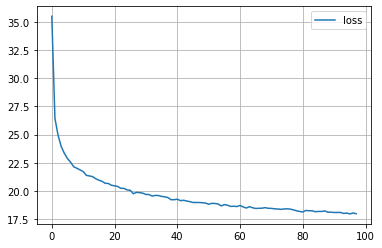

In [ ]:
plot_loss(history)

In [ ]:
val_acc_per_epoch = history.history['loss']
best_epoch = val_acc_per_epoch.index(min(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 96


In [ ]:
y_pred = model.predict(x_train)

In [ ]:
log_mae = np.log(mean_absolute_error(y_pred, y_train))
log_mae

2.8076478928584043

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
log_mae = np.log(mean_absolute_error(y_pred, y_true))
log_mae

2.883167346650617

In [ ]:
pretest = pd.read_csv("test.csv")
pretest.shape

(17000, 13)

In [ ]:
pretest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   MOFname                                        17000 non-null  object 
 1   volume [A^3]                                   17000 non-null  float64
 2   weight [u]                                     17000 non-null  float64
 3   surface_area [m^2/g]                           17000 non-null  float64
 4   void_fraction                                  17000 non-null  float64
 5   void_volume [cm^3/g]                           17000 non-null  float64
 6   functional_groups                              17000 non-null  object 
 7   metal_linker                                   17000 non-null  int64  
 8   organic_linker1                                17000 non-null  int64  
 9   organic_linker2                                170

In [ ]:
pretest['functional_groups'] = pretest['functional_groups'].replace({np.nan:0})
# train['void_fraction'] = train['void_fraction'].replace({'0':np.nan, 0:np.nan})
# train['void_volume [cm^3/g]'] = train['void_volume [cm^3/g]'].replace({'0':np. nan, 0:np.nan})

#train['functional_groups'] = train['functional_groups'].fillna(train.groupby('functional_groups')['functional_groups'].transform('mean'))
# train['void_fraction'] = train['void_fraction'].fillna(train.groupby('functional_groups')['void_fraction'].transform('mean'))
# train['void_volume [cm^3/g]'] = train['void_volume [cm^3/g]'].fillna(train.groupby('functional_groups')['void_volume [cm^3/g]'].transform('mean'))

In [ ]:
pretest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   MOFname                                        17000 non-null  object 
 1   volume [A^3]                                   17000 non-null  float64
 2   weight [u]                                     17000 non-null  float64
 3   surface_area [m^2/g]                           17000 non-null  float64
 4   void_fraction                                  17000 non-null  float64
 5   void_volume [cm^3/g]                           17000 non-null  float64
 6   functional_groups                              17000 non-null  object 
 7   metal_linker                                   17000 non-null  int64  
 8   organic_linker1                                17000 non-null  int64  
 9   organic_linker2                                170

In [ ]:
col = ["functional_groups", "topology"]
for i in col:
   pretest[i] = pretest[i].astype("category").cat.codes

In [ ]:
pretest

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]
0,mof_unit_68614,1208.301332,797.70936,586.54,0.11392,0.1039,260,2,5,26,5,36.63979083,7.005640
1,mof_unit_68615,4126.414623,3733.65779,852.49,0.21367,0.1422,128,4,6,17,0,18.39069095,5.119399
2,mof_unit_68616,1602.148373,747.21048,3155.73,0.33883,0.4375,34,3,11,17,5,13.06285017,5.045400
3,mof_unit_68617,2436.629312,995.80232,3521.09,0.40464,0.5963,300,2,1,28,5,9.60119754,5.106238
4,mof_unit_68618,3123.418006,1337.53800,2678.46,0.38959,0.5479,258,3,8,19,5,12.97495429,5.287639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,mof_unit_85609,32660.944605,4723.68288,5720.14,0.77614,3.2318,293,3,3,14,4,4.53662562,3.146698
16996,mof_unit_85610,5070.998617,1499.13262,4017.28,0.59192,1.2058,195,3,1,11,4,6.74550769,3.658871
16997,mof_unit_85611,4669.804446,1322.04892,4288.76,0.54950,1.1689,182,2,7,23,5,4.66620602,3.593052
16998,mof_unit_85612,4682.120862,1213.51148,4331.86,0.60643,1.4091,288,3,7,25,5,4.82330486,3.454497


In [ ]:
pretest = pretest.drop(['MOFname'],axis=1)

In [ ]:
scaler = StandardScaler()
pretest = pd.DataFrame(scaler.fit_transform(pretest), columns = pretest.columns)
pretest = scaler.inverse_transform(pretest)

In [ ]:
pretest

array([[1.20830133e+03, 7.97709360e+02, 5.86540000e+02, ...,
        5.00000000e+00, 3.66397908e+01, 7.00564000e+00],
       [4.12641462e+03, 3.73365779e+03, 8.52490000e+02, ...,
        0.00000000e+00, 1.83906909e+01, 5.11939900e+00],
       [1.60214837e+03, 7.47210480e+02, 3.15573000e+03, ...,
        5.00000000e+00, 1.30628502e+01, 5.04540000e+00],
       ...,
       [4.66980445e+03, 1.32204892e+03, 4.28876000e+03, ...,
        5.00000000e+00, 4.66620602e+00, 3.59305200e+00],
       [4.68212086e+03, 1.21351148e+03, 4.33186000e+03, ...,
        5.00000000e+00, 4.82330486e+00, 3.45449700e+00],
       [2.57026287e+04, 4.79321712e+03, 5.00639000e+03, ...,
        5.00000000e+00, 4.27818438e+00, 3.16987400e+00]])

In [ ]:
pretest_pred = model.predict(pretest)
pretest_pred

array([[ 15763.353 ],
       [  5129.4536],
       [ 49270.66  ],
       ...,
       [139503.83  ],
       [146185.58  ],
       [411277.22  ]], dtype=float32)

In [ ]:
submission = pd.DataFrame({
    "id": [str(i) for i in range(68614,85614)],
    "CO2_working_capacity [mL/g]": pretest_pred.T[0]
    })

submission.to_csv("submission.csv", index=False)

In [ ]:
!ls

init.ipynb    modelmaker.ipynb	pre.ipynb    submission.csv	train.csv
kook-2.ipynb  notebook-2.ipynb	pretest.csv  submission_NN.zip
kook.ipynb    notebook.ipynb	stang.ipynb  test.csv


In [ ]:
%%capture
!sudo apt-get update
!sudo apt-get install zip

In [ ]:
!zip submission_NN.zip submission.csv

updating: submission.csv (deflated 55%)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=679677c2-c780-422a-a432-9f2ffeaad3b4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>